<a href="https://colab.research.google.com/github/mr-cri-spy/machine-_-learning-/blob/main/Feature_Engineering_4_th.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
data = pd.read_csv("/content/train.csv")
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

Feature Selection
1. Univariate Selection
2. Feature Importance
3. Correlation Matrix

In [ ]:
x = data.drop(["price_range"],axis=1)
y = data['price_range']

In [ ]:
print(x.shape)
print(y.shape)

(2000, 20)
(2000,)


In [ ]:
## Univariate Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
kbest = SelectKBest(k=10,score_func = chi2)
features = kbest.fit(x,y)
df = pd.DataFrame()
df['Feature'] = x.columns
df['Score'] = features.scores_
df = df.sort_values("Score",ascending=False)
df.head(10)

,Feature,Score
13,ram,931267.519053
11,px_height,17363.569536
0,battery_power,14129.866576
12,px_width,9810.586750
8,mobile_wt,95.972863
6,int_memory,89.839124
15,sc_w,16.480319
16,talk_time,13.236400
4,fc,10.135166
14,sc_h,9.614878


In [ ]:
## Feature Importance

In [ ]:
## Univariate Selection
from sklearn.ensemble import ExtraTreesClassifier
trees = ExtraTreesClassifier()
trees.fit(x,y)
df = pd.DataFrame()
df['Feature'] = x.columns
df['Score'] = trees.feature_importances_
df = df.sort_values("Score",ascending=False)
df.head(10)

,Feature,Score
13,ram,0.384845
0,battery_power,0.059721
12,px_width,0.048157
11,px_height,0.047732
8,mobile_wt,0.037007
6,int_memory,0.036015
15,sc_w,0.035272
14,sc_h,0.035130
10,pc,0.035023
16,talk_time,0.034762


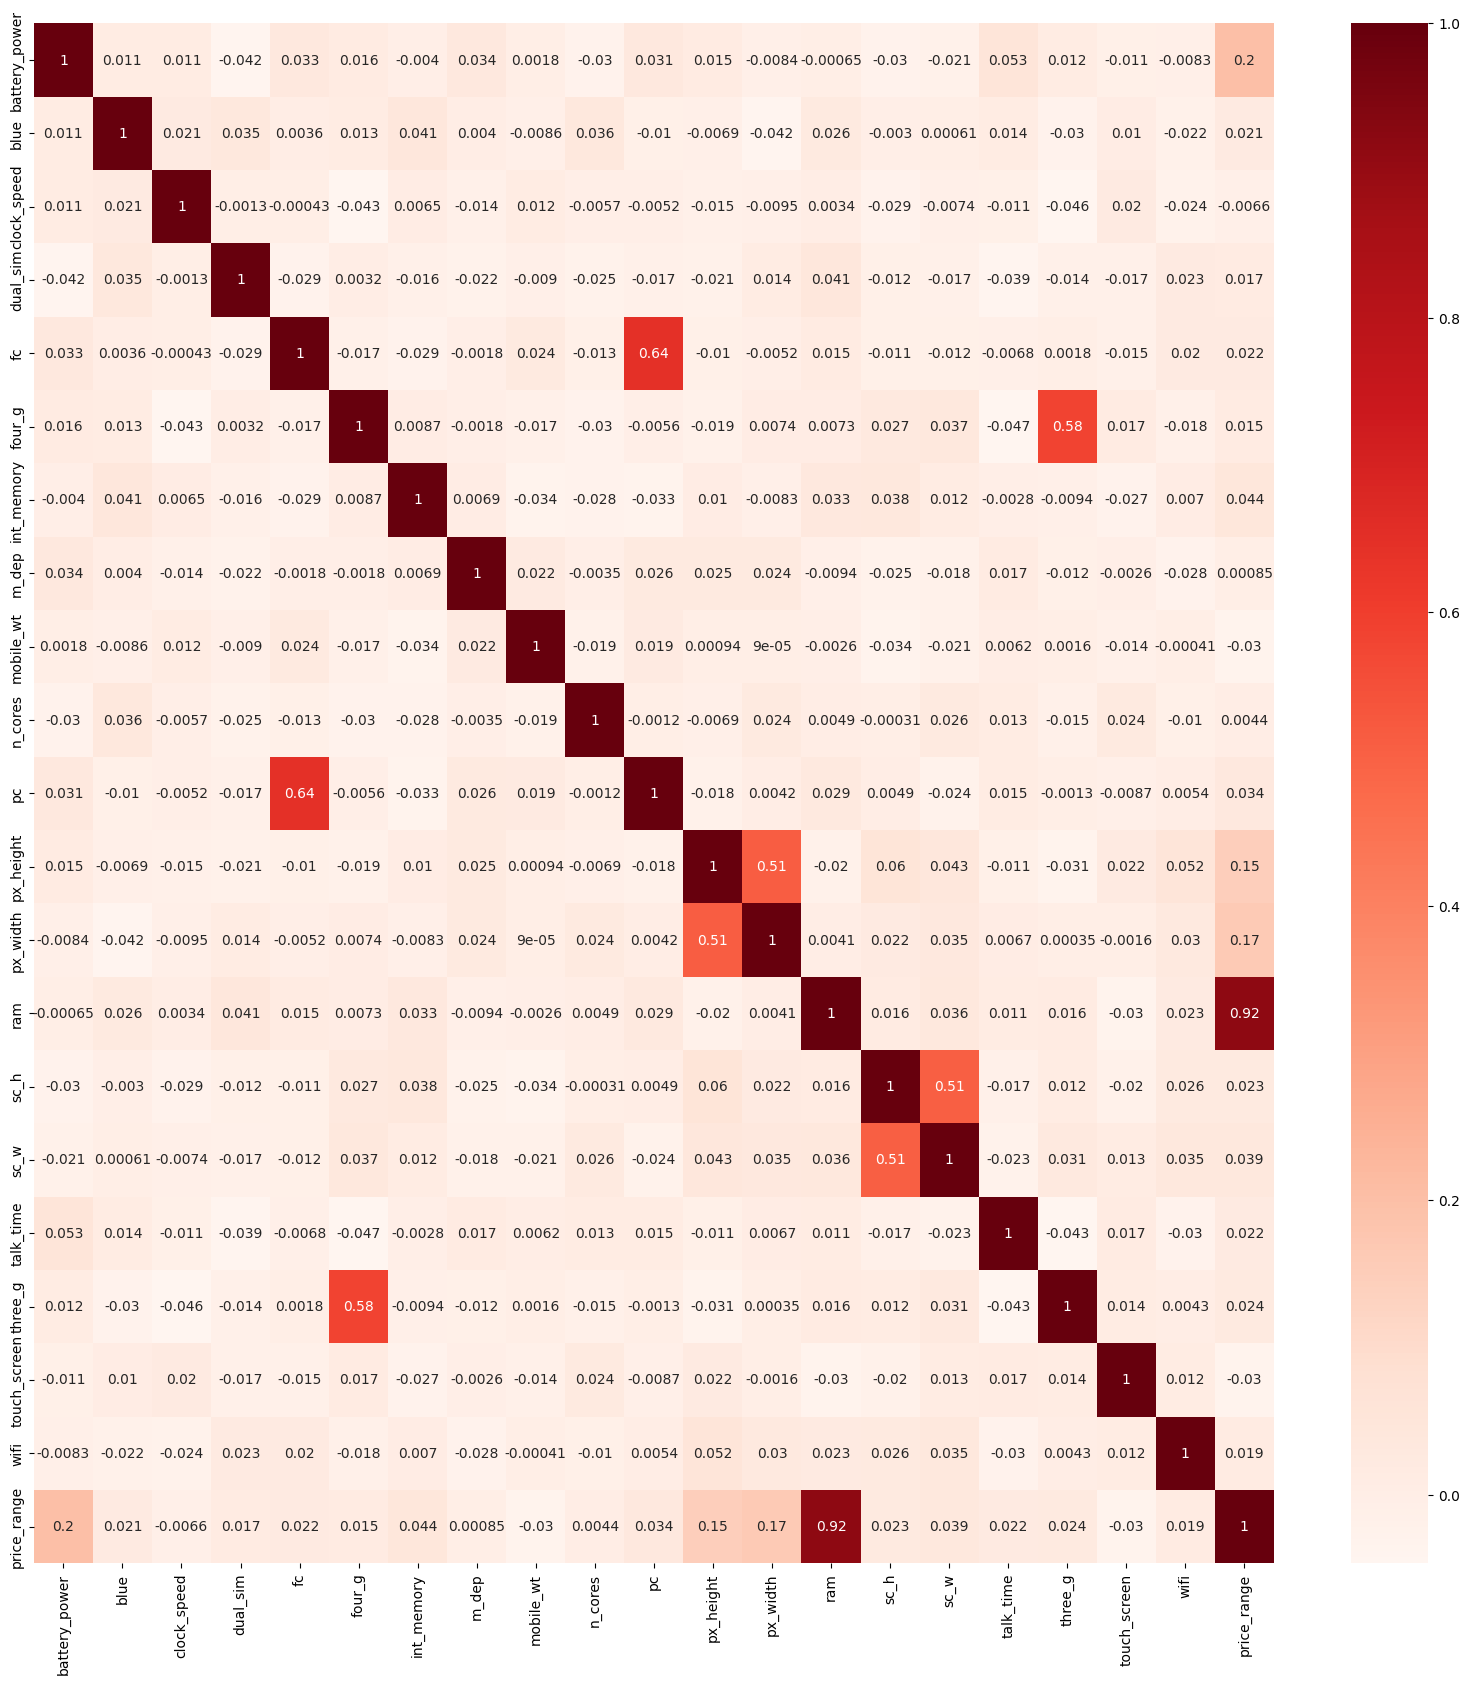

In [ ]:
## Correlation
plt.figure(figsize=(20,20))
corr = data.corr()
sns.heatmap(corr,annot=True,cmap="Reds")
plt.show()

In [ ]:
c = corr['price_range']
c = np.abs(c)
c = c.sort_values(ascending=False)
c.iloc[1:].head(10)

,price_range
ram,0.917046
battery_power,0.200723
px_width,0.165818
px_height,0.148858
int_memory,0.044435
sc_w,0.038711
pc,0.033599
touch_screen,0.030411
mobile_wt,0.030302
three_g,0.023611


Outliers
1. Boxplot
2. Scatter Plot
3. Using Z-Score
4. Using IQR - Inter Qunatile Range

In [ ]:
dataset = [30, 25, 28, 32, 26, 35, 29, 33, 27, 34, 31, 24, 22, 36, 21, 37, 30, 40, 20, 38,
          45, 43, 41, 44, 42, 46, 39, 48, 47, 50, 19, 15, 14, 18, 17, 16, 13, 12, 11, 10,
          60, 55, 54, 53, 52, 51, 49, 59, 58, 57, 120, -60, 110, -70, 140, -80, 200, -100, 90, -90,
          30, 25, 29, 28, 27, 26, 32, 35, 34, 33, 12, 14, 13, 15, 11, 10, 20, 19, 18, 16,
          25, 22, 24, 21, 23, 26, 30, 31, 28, 27, 130, -50, 150, -120, 170, 200, -90, 95, 80, 85]

In [ ]:
### Scatter Plot

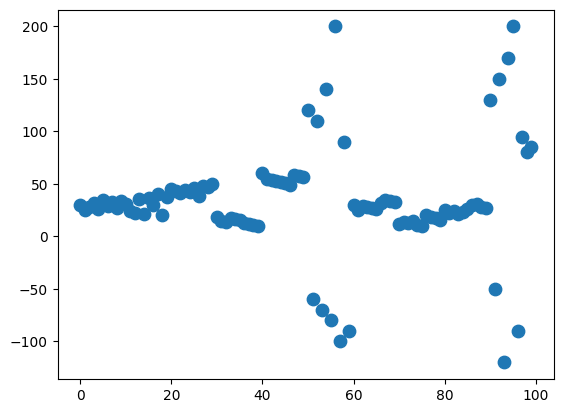

In [ ]:
plt.scatter(range(len(dataset)),dataset,s=80)
plt.show()

In [ ]:
### Box Plot

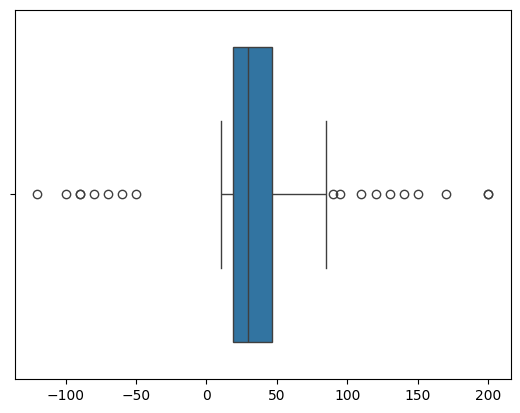

In [ ]:
sns.boxplot(x=dataset)
plt.show()

In [ ]:
## Using Z Score

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data = scaler.fit_transform(np.array(dataset).reshape(len(dataset),1))

array([[-0.06867565],
       [-0.16678373],
       [-0.10791889],
       [-0.02943242],
       [-0.14716212],
       [ 0.02943242],
       [-0.08829727],
       [-0.00981081],
       [-0.1275405 ],
       [ 0.00981081],
       [-0.04905404],
       [-0.18640535],
       [-0.22564858],
       [ 0.04905404],
       [-0.24527019],
       [ 0.06867565],
       [-0.06867565],
       [ 0.1275405 ],
       [-0.26489181],
       [ 0.08829727],
       [ 0.22564858],
       [ 0.18640535],
       [ 0.14716212],
       [ 0.20602696],
       [ 0.16678373],
       [ 0.24527019],
       [ 0.10791889],
       [ 0.28451343],
       [ 0.26489181],
       [ 0.32375666],
       [-0.28451343],
       [-0.36299989],
       [-0.3826215 ],
       [-0.30413504],
       [-0.32375666],
       [-0.34337827],
       [-0.40224312],
       [-0.42186473],
       [-0.44148635],
       [-0.46110797],
       [ 0.51997281],
       [ 0.42186473],
       [ 0.40224312],
       [ 0.3826215 ],
       [ 0.36299989],
       [ 0

In [ ]:
def detect_outlier_using_zscore(data):
  outliers = []
  threshold = 3
  mean = np.mean(data)
  std = np.std(data)
  for i in data:
    zscore = (i-mean)/std
    if np.abs(zscore) > threshold:
      outliers.append(i)
  return outliers

In [ ]:
detect_outlier_using_zscore(dataset)

[200, -120, 200]

Using IQR - Inter Quantile Range
1. Sort the data in ascending order
2. Calculate the first quantile(25 Percentile)- Q1
3. Calculate the third quantile(75 Percentile)- Q3
4. IQR = Q3 - Q1
5. Lower Bound Value = Q1 - (1.5 * IQR)
5. Upper Bound Value = Q3 + (1.5 * IQR)

The value in between the range of LBV and UBV are not outliers

In [ ]:
dataset = sorted(dataset)
dataset

[-120,
 -100,
 -90,
 -90,
 -80,
 -70,
 -60,
 -50,
 10,
 10,
 11,
 11,
 12,
 12,
 13,
 13,
 14,
 14,
 15,
 15,
 16,
 16,
 17,
 18,
 18,
 19,
 19,
 20,
 20,
 21,
 21,
 22,
 22,
 23,
 24,
 24,
 25,
 25,
 25,
 26,
 26,
 26,
 27,
 27,
 27,
 28,
 28,
 28,
 29,
 29,
 30,
 30,
 30,
 30,
 31,
 31,
 32,
 32,
 33,
 33,
 34,
 34,
 35,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 57,
 58,
 59,
 60,
 80,
 85,
 90,
 95,
 110,
 120,
 130,
 140,
 150,
 170,
 200,
 200]

In [ ]:
q1,q3 = np.percentile(dataset,[25,75])
print(q1,q3)

18.75 46.25


In [ ]:
iqr = q3 - q1
iqr

27.5

In [ ]:
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
print(lower_bound)
print(upper_bound)

-22.5
87.5


In [ ]:
outliers = []
def detect_outlier_using_iqr(data):
  for i in data:
    if i > upper_bound or i< lower_bound:
      outliers.append(i)
  return outliers

In [ ]:
detect_outlier_using_iqr(dataset)

[-120,
 -100,
 -90,
 -90,
 -80,
 -70,
 -60,
 -50,
 90,
 95,
 110,
 120,
 130,
 140,
 150,
 170,
 200,
 200]